# Exective summary of Work Package 2

## Objectives

In this WP, you will work on a given training dataset. Your goal is to develop a fault detection model using the classification algorithms learnt in the class, in order to achieve best F1 score.

## Tasks

- Task 1: Develop a fault detection model using the unsupervised learning algorithms learnt in the class, in order to achieve best F1 score.
- Task 2: With the help of the supporting script, develop a cross-validation scheme to test the performance of the developed classification algorithms.
- Task 3: Develop a fault detection model using the classification algorithms learnt in the class, in order to achieve best F1 score.

## Delierables

- A Jupyter notebook reporting the process and results of the above tasks


# Before starting, please:
- Fetch the most up-to-date version of the github repository.
- Create a new branch with your name, based on the "main" branch and switch to your own branch.
- Copy this notebook to the work space of your group, and rename it to TD_WP_2_Your name.ipynb
- After finishing this task, push your changes to the github repository of your group.

# Task 1: Unsupervised learning approaches

## Implement the statistical testing approach for fault detection

In this exercise, we interpret the statistical testing approach for fault detection. The basic idea of statistical testing approach is that we fit a multi-dimensitional distribution to the observation data under normal working condition. Then, when a new data point arrives, we design a hypothesis test to see whether the new data point is consistent with the distribution. If the new data point is consistent with the distribution, we can conclude that the fault is not due to the faulty component.

The benefit of this approach is that, to design the detection algrothim, we do not need failed data. Also, the computational time is short as all we need is just to compute the pdf and compare it to a threshold.

In this exercise, you need to:
- Fit a multi-dimensitional distribution to the training dataset (all normal samples).
- Design a fault detection algorithm based on the fitted distribution to detect faulty components.

The following block defines a few functions that you can use.

In [33]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import multivariate_normal


def estimateGaussian(X):
    '''Given X, this function estimates the parameter of a multivariate Gaussian distribution.'''
    mu = np.mean(X, axis=0)
    sigma2 = np.var(X, axis=0)
    return mu, sigma2


def classify(X, distribution, log_epsilon=-100000):
    '''Given X, this function classifies each sample in X based on the multivariate Gaussian distribution. 
       The decision rule is: if the log pdf is less than log_epsilon, we predict 1, as the sample is unlikely to be from the distribution, which represents normal operation.
    '''
    p = distribution.logpdf(X)
    predictions = (p < log_epsilon).astype(int)
    
    return predictions

Let us use the dataset `20240105_164214` as training dataset, as all the samples in this dataset are normal operation. We will use the dataset `20240325_155003` as testing dataset. Let us try to predict the state of motor 1. For this, we first extract the position, temperature and voltage of motor 1 as features (you can change the features if you want). 

In [87]:
import sys
sys.path.insert(0, 'C:/Users/weing/Documents/Centrale/Maintenance/Group_5/projects/maintenance_industry_4_2024/supporting_scripts/WP_1')

from utility import read_all_csvs_one_test
import pandas as pd

# Specify path to the dictionary.
base_dictionary = '../../dataset/training_data/'
dictionary_name = '20240105_164214'
path = base_dictionary + dictionary_name

# Read the data.
df_data = read_all_csvs_one_test(path, dictionary_name)

# Get the features
X_train = df_data[['data_motor_1_position', 'data_motor_1_temperature', 'data_motor_1_voltage','data_motor_2_voltage','data_motor_3_voltage','data_motor_4_voltage']]

# We do the same to get the test dataset.
dictionary_name = '20240325_155003'
path = base_dictionary + dictionary_name

# Read the data.
df_data = read_all_csvs_one_test(path, dictionary_name)

# Get the features
X_test = df_data[['data_motor_1_position', 'data_motor_1_temperature', 'data_motor_1_voltage','data_motor_2_voltage','data_motor_3_voltage','data_motor_4_voltage']]
y_test = df_data['data_motor_1_label']

Please design your algorithm below:

In [79]:
from sklearn.metrics import f1_score, accuracy_score


# First, we need to fit a MVN distribution to the normal samples.
# Put your code here.
mu, sigma2 = estimateGaussian(X_train)

# Construct a multivariate Gaussian distribution to represent normal operation.
distribution = multivariate_normal(mean=mu, cov=np.diag(sigma2))

# Now, let's try to predict the labels of the test set X_test.
# Put your code here.
y_pred = classify(X_test, distribution,-10**5.8)

# Calculate F1 score of the prediction.
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# Calculate F1 score of the prediction.
accuracy = f1_score(y_test, y_pred)
print("F1:", accuracy)

Accuracy: 0.9156644618159951
F1: 0.7396751740139212


**Discussions:**
- Can you please try to improve the performance of this approach?
    - For example, by normalizating the data?
    - By smoothing the data?
    - By reducing feature number?
    - etc.
- The parameter log_epsilon defines the threshold we use for making classification. What happens if you change it?
- Could you discuss how we should get the best value for this parameter?

In [67]:
from sklearn.metrics import f1_score,accuracy_score
from sklearn.preprocessing import MinMaxScaler


#Normalization

scaler=MinMaxScaler()
X_train_norm=scaler.fit_transform(X_train)
X_test_norm=scaler.transform(X_test)
# First, we need to fit a MVN distribution to the normal samples.
# Put your code here.
mu, sigma2 = estimateGaussian(X_train_norm)

# Construct a multivariate Gaussian distribution to represent normal operation.
distribution = multivariate_normal(mean=mu, cov=np.diag(sigma2))

# Now, let's try to predict the labels of the test set X_test.
# Put your code here.
y_pred = classify(X_test_norm, distribution,-10**5.8)

# Calculate F1 score of the prediction.
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# Calculate F1 score of the prediction.
accuracy = f1_score(y_test, y_pred)
print("F1:", accuracy)

Accuracy: 0.9156644618159951
F1: 0.7396751740139212


In [80]:
#Smoothing

from sklearn.metrics import f1_score


# First, we need to fit a MVN distribution to the normal samples.
# Put your code here.

X_train_smoothed=X_train.rolling(window=20, min_periods=1).mean()
X_test_smoothed=X_test.rolling(window=20, min_periods=1).mean()


mu, sigma2 = estimateGaussian(X_train_smoothed)

# Construct a multivariate Gaussian distribution to represent normal operation.
distribution = multivariate_normal(mean=mu, cov=np.diag(sigma2))

# Now, let's try to predict the labels of the test set X_test.
# Put your code here.
y_pred = classify(X_test_smoothed, distribution,-10**7)

print(y_pred)

# Calculate F1 score of the prediction.
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# Calculate F1 score of the prediction.
accuracy = f1_score(y_test, y_pred)
print("F1:", accuracy)



[1 1 1 ... 0 0 0]
Accuracy: 0.9164161154539988
F1: 0.7421150278293135


## Local outiler factor (LOF)

The local outlier factor (LOF) algorithm computes the local density deviation of a given data point with respect to its neighbors. It considers as outliers the samples that have a substantially lower density than their neighbors. You can easiliy implement LOF in scikit-learn ([tutorial](https://www.datatechnotes.com/2020/04/anomaly-detection-with-local-outlier-factor-in-python.html)).

Please implement local outlier factor (LOF) algorithm on the dataset of `20240325_155003`. You can try first to detect the failure of motor 1 using this model. Please calculate the accuracy score of your prediction.

In [81]:
from utility import read_all_csvs_one_test


# Define the path to the folder 'collected_data'
base_dictionary = 'C:/Users/weing/Documents/Centrale/Maintenance/Group_5/projects/maintenance_industry_4_2024/dataset/training_data/20240325_155003/'

#Choose which motor to study
motor_num=input()

# Read all the data
df_base = read_all_csvs_one_test(base_dictionary)
df = df_base[[f'data_motor_{motor_num}_position',  f'data_motor_{motor_num}_temperature',  f'data_motor_{motor_num}_voltage',f'data_motor_{motor_num}_label']]
df.size
df.head()


,data_motor_1_position,data_motor_1_temperature,data_motor_1_voltage,data_motor_1_label
0,487,38,7044,0
1,487,39,7028,0
2,487,39,7037,0
3,487,39,7055,0
4,487,39,7053,0


[1 1 1 ... 1 1 1]
Accuracy: 0.19422730006013228


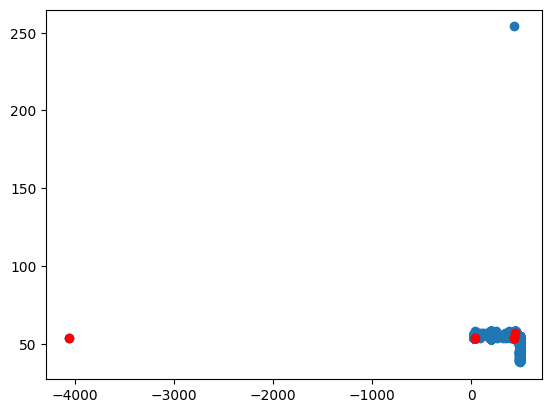

In [86]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.datasets import make_blobs
from numpy import quantile, where, random
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,f1_score




lof = LocalOutlierFactor(n_neighbors=600, contamination=.001)


y_pred = lof.fit_predict(X_test)


lofs_index = where(y_pred==-1)
values = X_test.iloc[lofs_index]


print(y_pred)

# Calculate F1 score of the prediction.
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


plt.scatter(X_test.iloc[:,0], X_test.iloc[:,1])
plt.scatter(values.iloc[:,0],values.iloc[:,1], color='r')
plt.show()

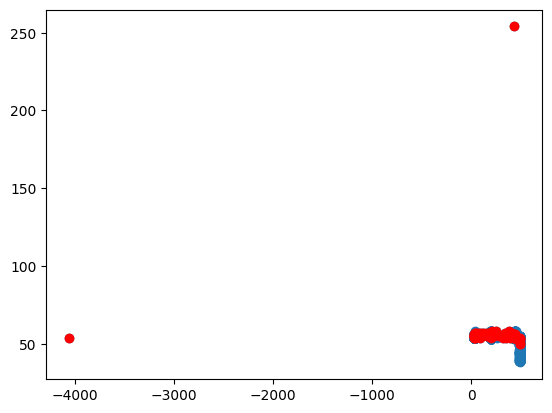

LocalOutlierFactor()
-1.9113600795793515


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [84]:

from sklearn.neighbors import LocalOutlierFactor
from sklearn.datasets import make_blobs
from numpy import quantile, where, random
import matplotlib.pyplot as plt




lof = LocalOutlierFactor(n_neighbors=20, contamination=.01)
 
y_pred = lof.fit_predict(df)


lofs_index=where(y_pred==-1)[0]
values = df.iloc[list(lofs_index),:]


plt.scatter(df.iloc[:,0], df.iloc[:,1])
plt.scatter(values.iloc[:,0],values.iloc[:,1], color='r')
plt.show()

model = LocalOutlierFactor(n_neighbors=20) 
print(model)  
model.fit_predict(df) 
 
lof = model.negative_outlier_factor_
thresh = quantile(lof, .03)
print(thresh) 
 
index = where(lof<=thresh)
values = df.iloc[index]

# Calculate F1 score of the prediction.
accuracy = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)


plt.scatter(df.iloc[:,0], df.iloc[:,1])
plt.scatter(values.iloc[:,0],values.iloc[:,1], color='r')
plt.show()



In [9]:
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import accuracy_score

# Charger le jeu de données
data=df

# Supprimer les colonnes inutiles ou non pertinentes
# data = data.drop(columns=['colonne_inutile_1', 'colonne_inutile_2', ...])

# Sélectionner les colonnes pertinentes pour l'analyse LOF (peut-être toutes les colonnes sauf la colonne de timestamp)
X = data.iloc[:, 1:]  # Exclure la première colonne (timestamp) si elle existe

# Initialiser et ajuster le modèle LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
lof.fit(X)

# Prédire les valeurs aberrantes
y_pred = lof.fit_predict(X)

# Supposons que vous ayez des étiquettes pour les échecs du moteur 1 dans une colonne 'motor1_failure'
# Comparez les prédictions avec les étiquettes réelles et calculez l'exactitude
ground_truth_labels = data['data_motor_1_label']
accuracy = accuracy_score(ground_truth_labels, y_pred)
print("Accuracy score:", accuracy)


Accuracy score: 0.16897173782321107


# Task 2 Develop a cross validation pipeline to evaluate the performance of the model.

The idea of cross validation is to split the data into k subsets and use one of them as the test set and the rest as the training set. The performance of the model is evaluated only on the test dataset, while the model is trained on the training dataset. By doing this, we ensure that the evaluation of the model is independent from the training of the model. Therefore, we can detect if the model is overfitted.

## k-fold cross validation

Here, we use motor 1 as an example to develop a pipeline for cross validation. Below, you have a script that read the data, extract features and get the labels.

1. Use sk-learn to split the data into training and testing sets, using a k-fold cross validation with k=5. (Hint: This is a routine task which can be answered easily by language models like chatgpt. You can try prompt like this: `Generate a code in python to split the data X and y into training and testing sets, using a k-fold cross validation with k=5.`)
2. Then, train a basic logistic regression model, without hyper-parameter tuning on the training set, and use the testing set to evaluate the performance of the model (calculate accuracy, precision, recall, and F1 score). 
3. Finally, train a logistic regression model, but use the entire dataset X and y as training data. Then, use the trained model to predict the labels of the same dataset (X). Compare the results with the previous step, and discuss why we should use cross validation to evaluate the performance of the model.

In [10]:
import sys
sys.path.insert(0, 'C:/Users/weing/Documents/Centrale/Maintenance/Group_5/projects/maintenance_industry_4_2024/supporting_scripts/WP_1')

from utility import read_all_test_data_from_path
import pandas as pd

# Specify path to the dictionary.
# Define the path to the folder 'collected_data'
base_dictionary = '../../dataset/training_data/'
# Read all the data
df_data = read_all_test_data_from_path(base_dictionary)

# Extract the features for motor 1: You should replace the features with the ones you have selected in WP1.
X = df_data[['data_motor_1_position', 'data_motor_1_temperature', 'data_motor_1_voltage']]
# Get the label
y = df_data['data_motor_1_label']


ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

Write your discussions here:


# Task 3: Develop classification-based fault detection models

In this task, you are supposed to experiment different classification-based fault detection models to get best F1 score. Please use the 5-fold cross-validation to calculate the best F1 score. You are free to try different models, whether they are discussed in the class or not. To simply your work, you can use the models existed in [scikit-learn](https://scikit-learn.org/stable/supervised_learning.html).

Please report all the models you tried, how to you tune their hyperparameters, and the corresponding F1 score. Please note that if you would like to tune the hyperparameter, you can use the `GridSearchCv` function in scikit-learn, but you should use it only on the training dataset.

## Logistic regression

In [ ]:
# Your code here:

## Summary of the results

Please add a table in the end, summarying the results from all the models (including the unsupervised learning models). Please write a few texts to explain what is the best model you got, its performance, and how could you further improve it.

| Model   | Accuracy | Precision | Recall | F1   |
|---------|----------|-----------|--------|------|
| Model 1 |   XX.X%  |   XX.X%   |  XX.X% | XX.X%|
| Model 2 |   XX.X%  |   XX.X%   |  XX.X% | XX.X%|
| Model 3 |   XX.X%  |   XX.X%   |  XX.X% | XX.X%|
